## Assignment 12: The goal of this assignment is to tune models using caret for the titanic and adult data sets. 

### The code chunk below establishes the mode function and loads in the libraries neccessary for this assignment. The following code chunks carry out the tasks given in the assignment.

In [1]:
calculate_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

library(caret)
library(rpart)
library(ranger)
library(glmnet)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



### 1.	Preprocess the data so that it is ready to train predictive models.

In [2]:
#Prepare adult data
adults <- read.csv("adult.csv", header = FALSE)
names(adults) = c("age", "workclass", "finalweight", "education", "educationnum", "maritalstatus", "occupation", "realtionship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek", "nativecountry", "income")

adults[adults == "?"] <- NA
for(i in 1:ncol(adults))
{
if(is.numeric(adults[,i])==FALSE)
{adults[,i][is.na(adults[,i])] <-  calculate_mode(adults[,i])}
}

levels(adults$education) <- c("Gradeschool", "Gradeschool", "Gradeschool", "Gradeschool", "Gradeschool", "Gradeschool", "Gradeschool", "Associates", "Associates", "Bachelors", "Post-grad", "HS+", "Post-grad", "Gradeschool", "HS+", "HS+")

levels(adults$occupation) <- c("Misc", "Business", "Protection", "Labor", "Business", "Labor", "Labor", "Tech", "Misc", "Labor", "Misc", "Protection", "Business", "Tech", "Labor")

levels(adults$nativecountry) <- c("NA", "Africa", "NA", "Asia","SA", "NA", "NA", "SA", "NA", "EU", "EU", "EU", "EU", "NA", "NA", "EU", "NA", "Asia", "EU", "Asia", "Asia", "EU", "EU", "NA", "Asia", "Asia", "NA", "NA", "NA", "SA", "Asia", "EU", "EU", "NA", "EU", "Asia", "Asia", "Asia", "NA", "NA", "Asia", "EU" )

dummies_model <- dummyVars(income ~ ., data=adults)
adults_mat <- predict(dummies_model, newdata = adults)
adultsfix <- data.frame(adults_mat)
adultsfix$income <- adults$income

ScaleandCenter <- preProcess(adultsfix, method= c("center", "scale"))
finaladult <- predict(ScaleandCenter, newdata = adultsfix)
str(finaladult)

#Prepare titanic data
titanic = read.csv("titanic.csv")
titanic$Survived=factor(titanic$Survived)
titanic$Pclass = factor(titanic$Pclass)
titanic[is.na(titanic$Age),]$Age = mean(titanic$Age, na.rm =TRUE)
titanic$Name = NULL
titanic$PassengerId = NULL
titanic$Cabin = NULL
titanic$Ticket = NULL

dummies_model <- dummyVars(Survived ~ ., data=titanic)
titanic_mat <- predict(dummies_model, newdata = titanic)
titanicfix <- data.frame(titanic_mat)
titanicfix$Survived <- titanic$Survived

ScaleandCenter <- preProcess(titanicfix, method= c("center", "scale"))
finaltitanic <- predict(ScaleandCenter, newdata = titanicfix)
str(finaltitanic)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"Warning message in preProcess.default(adultsfix, method = c("center", "scale")):
"These variables have zero variances: workclass.."

'data.frame':	32561 obs. of  51 variables:
 $ age                                : num  0.0307 0.8371 -0.0426 1.057 -0.7758 ...
 $ workclass..                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ workclass.Federal.gov              : num  -0.174 -0.174 -0.174 -0.174 -0.174 ...
 $ workclass.Local.gov                : num  -0.262 -0.262 -0.262 -0.262 -0.262 ...
 $ workclass.Never.worked             : num  -0.0147 -0.0147 -0.0147 -0.0147 -0.0147 ...
 $ workclass.Private                  : num  -1.748 -1.748 0.572 0.572 0.572 ...
 $ workclass.Self.emp.inc             : num  -0.188 -0.188 -0.188 -0.188 -0.188 ...
 $ workclass.Self.emp.not.inc         : num  -0.291 3.437 -0.291 -0.291 -0.291 ...
 $ workclass.State.gov                : num  4.908 -0.204 -0.204 -0.204 -0.204 ...
 $ workclass.Without.pay              : num  -0.0207 -0.0207 -0.0207 -0.0207 -0.0207 ...
 $ finalweight                        : num  -1.064 -1.009 0.245 0.426 1.408 ...
 $ education.Gradeschool              : num  

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Survived' is not a factor"

'data.frame':	891 obs. of  14 variables:
 $ Pclass.1  : num  -0.565 1.767 -0.565 1.767 -0.565 ...
 $ Pclass.2  : num  -0.51 -0.51 -0.51 -0.51 -0.51 ...
 $ Pclass.3  : num  0.902 -1.107 0.902 -1.107 0.902 ...
 $ Sex.female: num  -0.737 1.355 1.355 1.355 -0.737 ...
 $ Sex.male  : num  0.737 -1.355 -1.355 -1.355 0.737 ...
 $ Age       : num  -0.592 0.638 -0.285 0.408 0.408 ...
 $ SibSp     : num  0.433 0.433 -0.474 0.433 -0.474 ...
 $ Parch     : num  -0.473 -0.473 -0.473 -0.473 -0.473 ...
 $ Fare      : num  -0.502 0.786 -0.489 0.42 -0.486 ...
 $ Embarked. : num  -0.0474 -0.0474 -0.0474 -0.0474 -0.0474 ...
 $ Embarked.C: num  -0.482 2.073 -0.482 -0.482 -0.482 ...
 $ Embarked.Q: num  -0.307 -0.307 -0.307 -0.307 -0.307 ...
 $ Embarked.S: num  0.619 -1.614 0.619 0.619 0.619 ...
 $ Survived  : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...


### 2.	Train a random forest with 7-fold cross validation.  Report the accuracy of the forest. 

In [3]:
# Ran with small range of hyperparamaters instead of default to shorten run time
set.seed(42)
myGrid = expand.grid(mtry = 2, splitrule = "gini",
                     min.node.size = c(1:3))  
  
CV7titanic <- train( Survived~. ,data = finaltitanic, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE), tuneGrid=myGrid)

CV7adult <- train( income~. ,data = finaladult, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE), tuneGrid=myGrid)


print("Accuracy Titanic")
max(CV7titanic$results$Accuracy)

print("Accuracy Adult")
max(CV7adult$results$Accuracy)

[1] "Accuracy Titanic"


[1] 0.8192634

[1] "Accuracy Adult"


[1] 0.8274011

### 3.	Train a decision tree with 10-fold cross validation.  Report the accuracy. 

In [4]:
CV10titanic <- train( Survived~. ,data = finaltitanic, method = "rpart", 
               trControl = trainControl(method ="cv", number = 10, verboseIter = FALSE))

CV10adult <- train( income~. ,data = finaladult, method = "rpart", 
               trControl = trainControl(method ="cv", number = 10, verboseIter = FALSE))


print("Accuracy Titanic")
max(CV10titanic$results$Accuracy)

print("Accuracy Adult")
max(CV10adult$results$Accuracy)

[1] "Accuracy Titanic"


[1] 0.8125539

[1] "Accuracy Adult"


[1] 0.8380577

### 4.	What are the selection of the hyperparameters (mtry, splitrule, min.mode.size) in the random forest in 2? 

##### For titanic the hyperparamerters were: mtry = 2 , splitrule = gini, min.node.size = 2
##### For adult the hyperparamerters were: mtry =  2, splitrule = gini, min.node.size = 1

In [5]:
CV7titanic
CV7adult

Random Forest 

891 samples
 13 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 764, 765, 763, 764, 764, 763, ... 
Resampling results across tuning parameters:

  min.node.size  Accuracy   Kappa    
  1              0.8170400  0.5928938
  2              0.8192634  0.5979587
  3              0.8181472  0.5947702

Tuning parameter 'mtry' was held constant at a value of 2
Tuning
 parameter 'splitrule' was held constant at a value of gini
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 2.

Random Forest 

32561 samples
   50 predictor
    2 classes: '<=50K', '>50K' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 27910, 27909, 27910, 27910, 27909, 27909, ... 
Resampling results across tuning parameters:

  min.node.size  Accuracy   Kappa    
  1              0.8274011  0.4292660
  2              0.8273705  0.4274047
  3              0.8269404  0.4265455

Tuning parameter 'mtry' was held constant at a value of 2
Tuning
 parameter 'splitrule' was held constant at a value of gini
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 1.

### 5.	Print out the plot of the random forest.

###### Titanic Plot

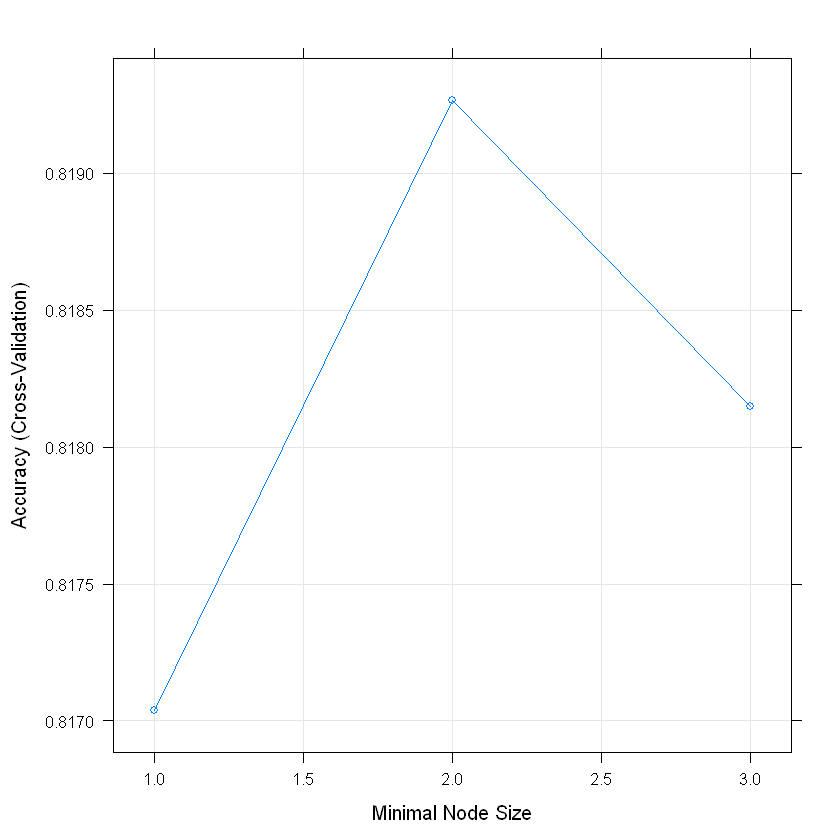

In [6]:
plot(CV7titanic)

##### Adult Plot

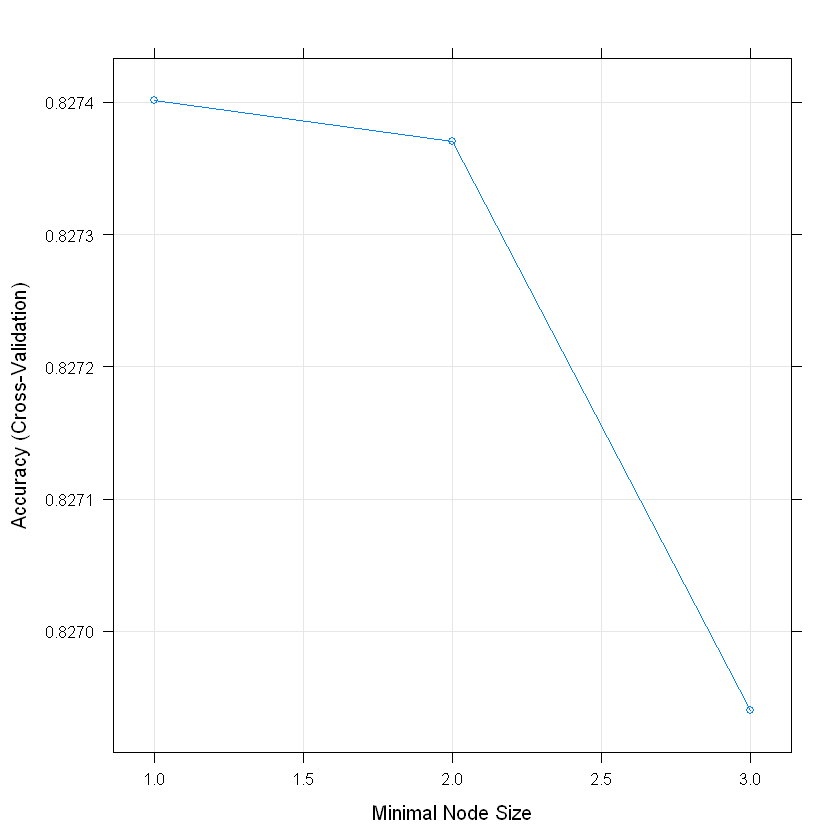

In [7]:
plot(CV7adult)

### 6.	Tune the three hyperparameters of the random forest with mtry running all its possible values, splitrule running all its possible values (gini and extratrees) and min.node.size running from 1 to 20.

In [8]:
#mtry kept within 3 values and min node kept from 1 to 3 to reduce runtime
myGrid = expand.grid(mtry = c(2,3,4), splitrule = c("gini", "extratrees"),
                     min.node.size = c(1:3))  
  
CV7titanic2 <- train( Survived~. ,data = finaltitanic, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE), tuneGrid=myGrid)

CV7adult2 <- train( income~. ,data = finaladult, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE), tuneGrid=myGrid)

### 7.	Print out the tuning plot of the random forest.  Does your tuned random forest in 6 achieve better accuracy than the default random forest in 2? 

[1] "Accuracy Titanic"


[1] 0.8350148

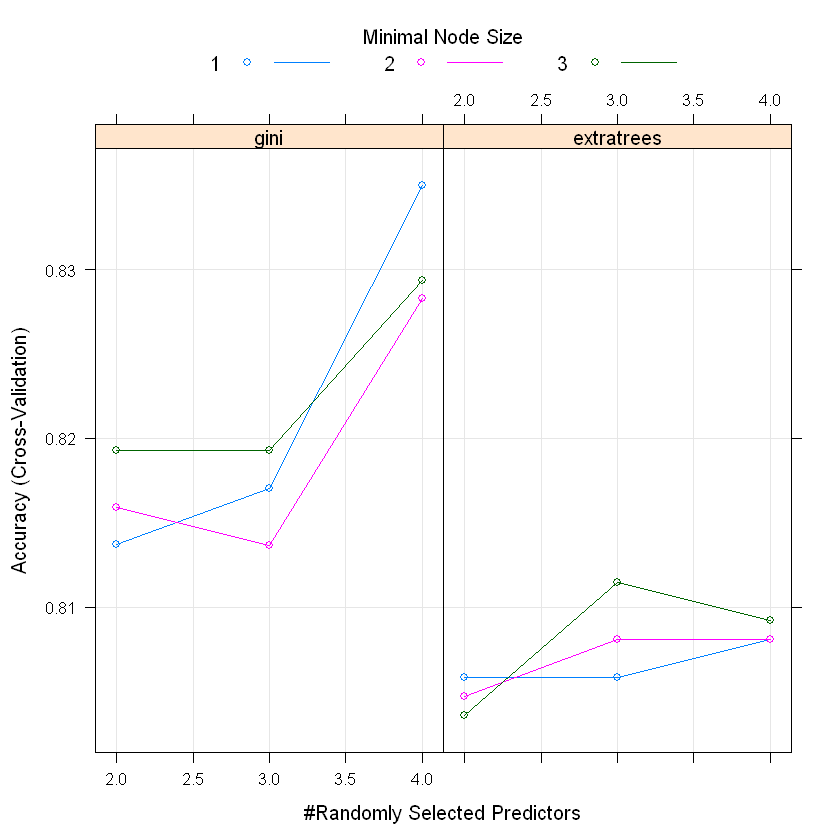

In [9]:
print("Accuracy Titanic")
max(CV7titanic2$results$Accuracy)
plot(CV7titanic2)

[1] "Accuracy Adult"


[1] 0.8588803

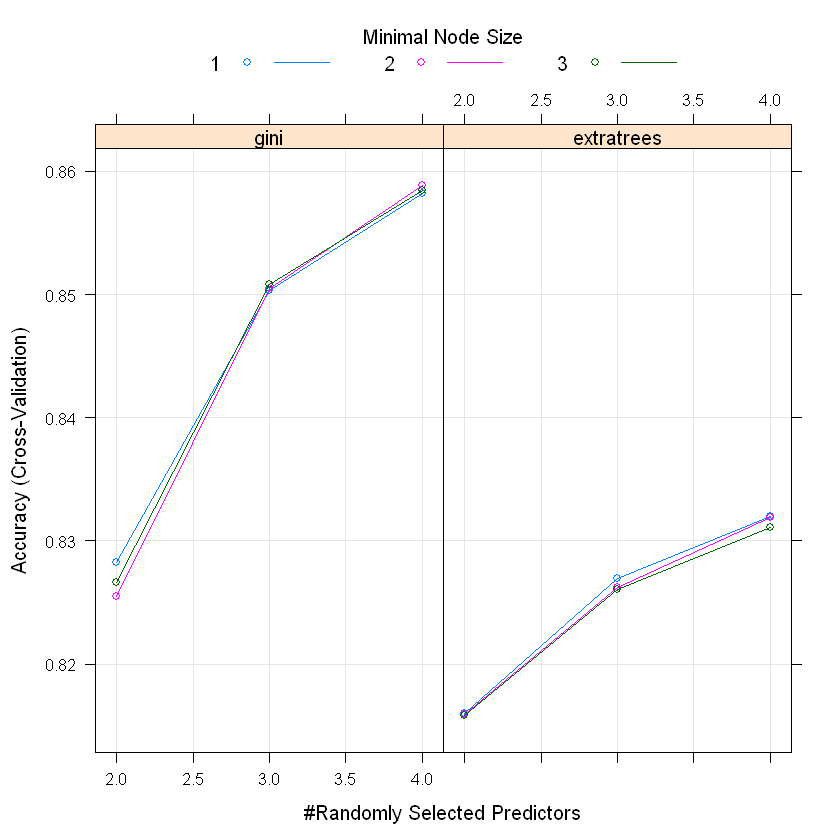

In [10]:
print("Accuracy Adult")
max(CV7adult2$results$Accuracy)
plot(CV7adult2)

##### The random forest tuned with a higher range of hyperparameters will always have higher accuracy as long as it contains the smaller range of hyperparameters.  This can be seen here as the random forest in #6 performs better than the random forest in #2.

### 8.	Compare the performances of the default glmnet model and a tuned glmnet model. Do you achieve better performance in the tuned glmnet model? 

In [11]:
#Default glm
  
glmtitanic <- train( Survived~. ,data = finaltitanic, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE))

glmadult <- train( income~. ,data = finaladult, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE))


#tuned glm
myGridglm = expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 5))  
  
glmtitanic2 <- train( Survived~. ,data = finaltitanic, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE), tuneGrid=myGridglm)

glmadult2 <- train( income~. ,data = finaladult, method = "glmnet", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = FALSE), tuneGrid=myGridglm)

print("Accuracy Titanic non-tuned")
max(glmtitanic$results$Accuracy)

print("Accuracy Adult non-tuned")
max(glmadult$results$Accuracy)

print("Accuracy Titanic tuned")
max(glmtitanic2$results$Accuracy)

print("Accuracy Adult tuned")
max(glmadult2$results$Accuracy)

print("Accuracy for the adult and titanic datasets should be higher for tuned glm models, however, this may not always be the case when there aren't a lot of hyperparameters selected in the tuned model. In this case, the tuned models perform better.")

[1] "Accuracy Titanic non-tuned"


[1] 0.7968223

[1] "Accuracy Adult non-tuned"


[1] 0.8472408

[1] "Accuracy Titanic tuned"


[1] 0.8058827

[1] "Accuracy Adult tuned"


[1] 0.8472409

[1] "Accuracy for the adult and titanic datasets should be higher for tuned glm models, however, this may not always be the case when there aren't a lot of hyperparameters selected in the tuned model. In this case, the tuned models perform better."
